In [1]:
#transformation

import pandas as pd
df1=pd.read_csv("d:/csv-ml/boston_dataset.csv")

In [2]:
df1.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df1=df1.drop("Unnamed: 0",axis=1)

In [4]:
x=df1.iloc[:,0:13]
y=df1.iloc[:,13]

# Primer model or full model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [6]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=.2,random_state=100)

In [7]:
lm_model=LinearRegression().fit(x_tr,y_tr)

In [8]:
y_fitted=lm_model.predict(x_tr)

In [9]:
import numpy as np
resid=np.array(y_fitted)-np.array(y_tr)


In [10]:
r2_score(y_tr,y_fitted)

0.7337332767917557

In [11]:
p=lm_model.predict(x_test)

In [12]:
#validation tests of linear regression

In [13]:
#Linearity

<AxesSubplot:>

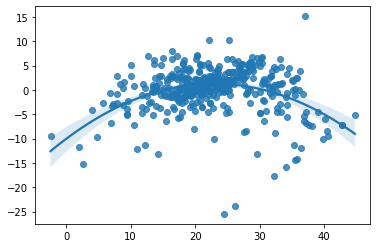

In [14]:
#residual plot
import seaborn as sns
sns.regplot(x=y_fitted,y=resid,order=2)



In [15]:
#inference the residual plot shows a u shaped pattern which indicates data is not linear

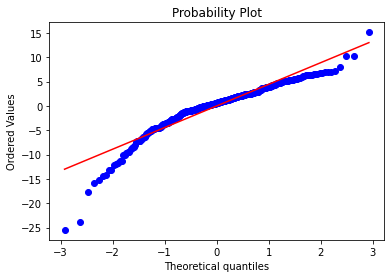

In [16]:
#qqplot
from scipy import stats
import pylab
stats.probplot(resid,dist="norm",plot=pylab)
pylab.show()

In [17]:
#the head and tail of the qqplot deviates from the straight line ,indicates residuals are not normally distributed 
#and presence of outliers

In [18]:
#shapiro wilk test
from scipy import stats
stats.shapiro(resid)

ShapiroResult(statistic=0.9052581191062927, pvalue=3.4911509006775848e-15)

In [19]:
#pvalue less than .05 ,residuals not normally distributed

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

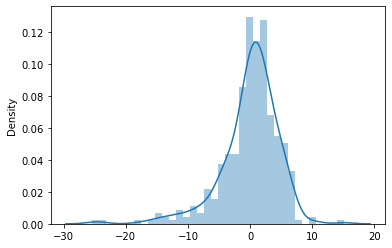

In [20]:
#distplot
sns.distplot(resid)

In [21]:
from scipy.stats import skew
skew(resid)

-1.4515832827670057

In [22]:
#the residuals are highly left skewed

In [23]:
from scipy.stats import kurtosis
kurtosis(resid)

4.721692034819947

In [24]:
#kurtosis is more than 3 ,indicates the presence of outliers

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

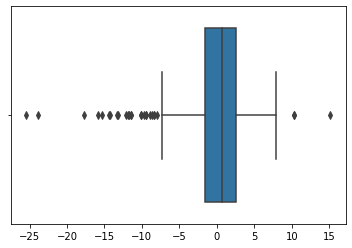

In [25]:
sns.boxplot(resid)

In [26]:
#durbin watson test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
durbin_watson(resid)

2.029021412907427

In [27]:
#the p value from durbin watson test indicates no autocorrelation

In [28]:
#bptest for heterskedascity
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(resid,x_tr)

(94.52162545398019,
 6.540681130804628e-15,
 9.186165792861726,
 1.3284427708708336e-16)

In [29]:
#p-value less than .05 heroskedascity oresent

In [30]:
# log transformation of dependant variable

In [31]:
y_log=np.log(y)
x_tr,x_test,y_tr,y_test=train_test_split(x,y_log,test_size=.2,random_state=100)

In [32]:
model_log_lm=LinearRegression().fit(x_tr,y_tr)
log_fitted=model_log_lm.predict(x_tr)
p_log=model_log_lm.predict(x_test)
p_actual=np.exp(p_log)
r2_score(y_tr,log_fitted)

0.7875326530065212

In [33]:
#accuracy of linear regression with log transformation of target variable is 78%

In [34]:
resid_log=np.array(log_fitted)-np.array(y_tr)

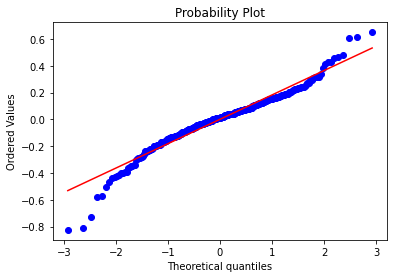

In [35]:
stats.probplot(resid_log,dist="norm",plot=pylab)
pylab.show()

In [36]:
#skewness has reduced after log transformation
skew(resid_log)

-0.551501599775041

In [37]:
stats.shapiro(resid_log)

ShapiroResult(statistic=0.9531532526016235, pvalue=5.036966399529774e-10)

In [38]:
stats.shapiro(resid_log)

ShapiroResult(statistic=0.9531532526016235, pvalue=5.036966399529774e-10)

In [39]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(resid_log,x_tr)

(115.91629988907717,
 4.0172122489879986e-19,
 12.10205795670816,
 3.2984839960455186e-22)

In [40]:
#heteroskedasity present

# log10 transformation

In [41]:
y_log10=np.log10(y)
x_tr,x_test,y_tr,y_test=train_test_split(x,y_log10,test_size=.2,random_state=100)
model_log_lm=LinearRegression().fit(x_tr,y_tr)
log10_fitted=model_log_lm.predict(x_tr)
r2_score(y_tr,log10_fitted)


0.7875326530065212

In [42]:
#Accuracy on training dataset with log10 transformation of the taret variable is 78.75

In [43]:
p_log10=model_log_lm.predict(x_test)
r2_score(y_test,p_log10)

0.7840794771166174

In [44]:
#Accuracy on test dataset with log10 transformation of the taret variable is 78.40%

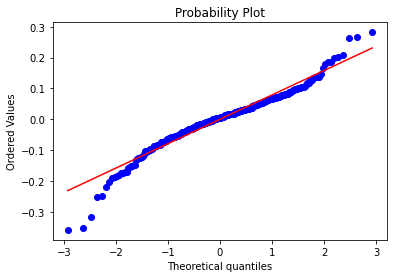

In [45]:
resid_log10=np.array(log10_fitted)-np.array(y_tr)
stats.probplot(resid_log10,dist="norm",plot=pylab)
pylab.show()

<AxesSubplot:>

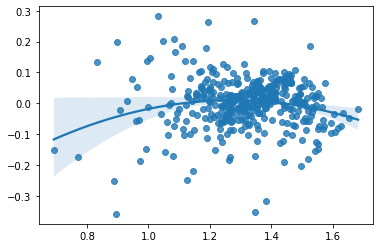

In [46]:
sns.regplot(x=log10_fitted,y=resid_log10,order=2)

In [47]:
stats.shapiro(resid_log10)

ShapiroResult(statistic=0.953153669834137, pvalue=5.037568140409121e-10)

# log transformation of independant as well as dependant variable



In [48]:
# Box cox transformation

In [49]:
from scipy.special import boxcox1p
from scipy.special import boxcox
from scipy.special import inv_boxcox
df_trans=df1.apply(lambda x: boxcox1p(x,0.0))

In [50]:
df_trans.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.006300,2.944439,1.196948,0.0,0.430483,2.024853,4.192680,1.627278,0.693147,5.693732,2.791165,5.986201,1.788421,3.218876
1,0.026944,0.000000,2.088153,0.0,0.384582,2.004314,4.380776,1.786261,1.098612,5.493061,2.933857,5.986201,2.316488,3.117950
2,0.026924,0.000000,2.088153,0.0,0.384582,2.102303,4.128746,1.786261,1.098612,5.493061,2.933857,5.975919,1.615420,3.575151
3,0.031857,0.000000,1.156881,0.0,0.377066,2.079192,3.845883,1.954757,1.386294,5.407172,2.980619,5.980479,1.371181,3.538057
4,0.066770,0.000000,1.156881,0.0,0.377066,2.097650,4.010963,1.954757,1.386294,5.407172,2.980619,5.986201,1.845300,3.616309


In [51]:
x=df_trans.iloc[:,0:13]
y=df_trans.iloc[:,13]

In [52]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=.2,random_state=100)
model_log_lm=LinearRegression().fit(x_tr,y_tr)
log_fitted_full=model_log_lm.predict(x_tr)
r2_score(y_tr,log_fitted_full)

0.7961666197757251

In [53]:
resid=np.array(log_fitted_full)-np.array(y_tr)

In [54]:
p=model_log_lm.predict(x_test)

In [55]:
r2_score(y_test,p)

0.7979312627950955

In [56]:
#The accuracy after taking log of dependant as well as independant variable is 79.79. 

In [57]:
stats.shapiro(resid)


ShapiroResult(statistic=0.9611989259719849, pvalue=7.583791372667292e-09)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

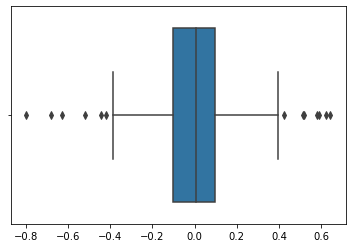

In [58]:
sns.boxplot(resid)

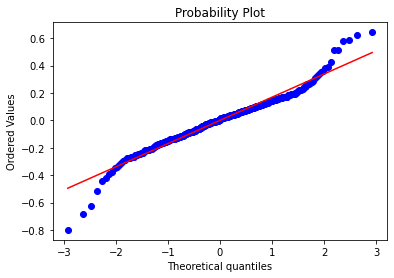

In [59]:
stats.probplot(resid,dist="norm",plot=pylab)
pylab.show()

<AxesSubplot:>

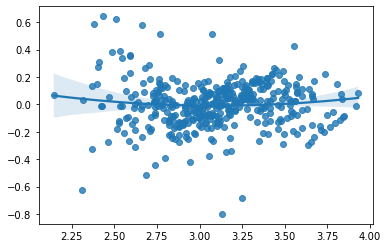

In [60]:
sns.regplot(x=log_fitted_full,y=resid,order=2)

In [61]:
y_actual=inv_boxcox(y_test,0.0)

In [62]:
p_actual=inv_boxcox(p,0.0)

In [63]:
r2_score(y_actual,p_actual)

0.7835889802690212

# squareroot transformation

In [64]:
from scipy.special import boxcox1p
from scipy.special import boxcox
from scipy.special import inv_boxcox
df_sq=df1.apply(lambda x: boxcox1p(x,0.5))

In [65]:
x=df_sq.iloc[:,0:13]
y=df_sq.iloc[:,13]

In [66]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=.2,random_state=100)
model_log_lm=LinearRegression().fit(x_tr,y_tr)
sq_fitted=model_log_lm.predict(x_tr)
r2_score(y_tr,sq_fitted)

0.7931055959153698

In [67]:
p_sq=model_log_lm.predict(x_test)
r2_score(y_test,p_sq)

0.8072599170960144

In [155]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,p_sq))

17.07308525908409

# The accuracy of linear regression model after square root transformation on the test dataset is  around 80.72 which is the best model so far

In [68]:
resid=np.array(sq_fitted)-np.array(y_tr)

In [69]:
#skewness is below 1
skew(resid)

-0.9222432517134389

In [131]:
#kurtosis is at 3
kurtosis(resid)

array([4.72169203])

<AxesSubplot:>

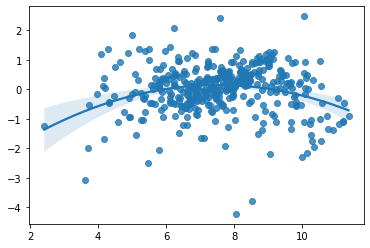

In [71]:
sns.regplot(x=sq_fitted,y=resid,order=2)

# scaling transformation

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
#x_scaled=(x-mean)/sd

In [74]:
x=df1.iloc[:,0:13]
y=df1.iloc[:,[13]]

In [75]:
x_scaled=StandardScaler().fit_transform(x)

In [76]:
y_scaled=StandardScaler().fit_transform(y)

In [77]:
x_tr,x_test,y_tr,y_test=train_test_split(x_scaled,y_scaled,test_size=.2,random_state=100)
model_scaled_lm=LinearRegression().fit(x_tr,y_tr)
fitted=model_scaled_lm.predict(x_tr)
r2_score(y_tr,fitted)

0.7337332767917557

In [78]:
resid=np.array(fitted)-np.array(y_tr)

In [79]:
skew(resid)

array([-1.45158328])

In [80]:
p=model_scaled_lm.predict(x_test)


In [81]:
r2_score(y_test,p)

0.7555033086871293

In [82]:
#the accuracy on the test dataset after scaling through z-score normalization is 75.55

# Conclusion

# The best model for linear regression obtained after applying square root transformation which is 80.72

In [ ]:
#applying non linear regression KNN

In [87]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [103]:
x=df1.iloc[:,0:13]
y=df1.iloc[:,[13]]

In [104]:
x_tr,x_test,y_tr,y_test=train_test_split(x_scaled,y,test_size=.2,random_state=100)

In [105]:
x_scaled=StandardScaler().fit_transform(x)

In [106]:
#finding the optimal value of k

In [107]:
params={"n_neighbors":range(1,21)}

In [108]:
gs=GridSearchCV(KNeighborsRegressor(),params).fit(x_tr,y_tr)

In [109]:
gs.best_params_

{'n_neighbors': 3}

In [110]:
knn_mod=KNeighborsRegressor(n_neighbors=3).fit(x_tr,y_tr)

In [111]:
p_knn=knn_mod.predict(x_test)

In [112]:
r2_score(y_test,p_knn)

0.7978063255470809

In [113]:
#The accuracy of non linear regression using knn is not giving me significantly different results

In [ ]:
#lets try decision tree

In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

In [122]:
dtree_reg=DecisionTreeRegressor().fit(x_tr,y_tr)

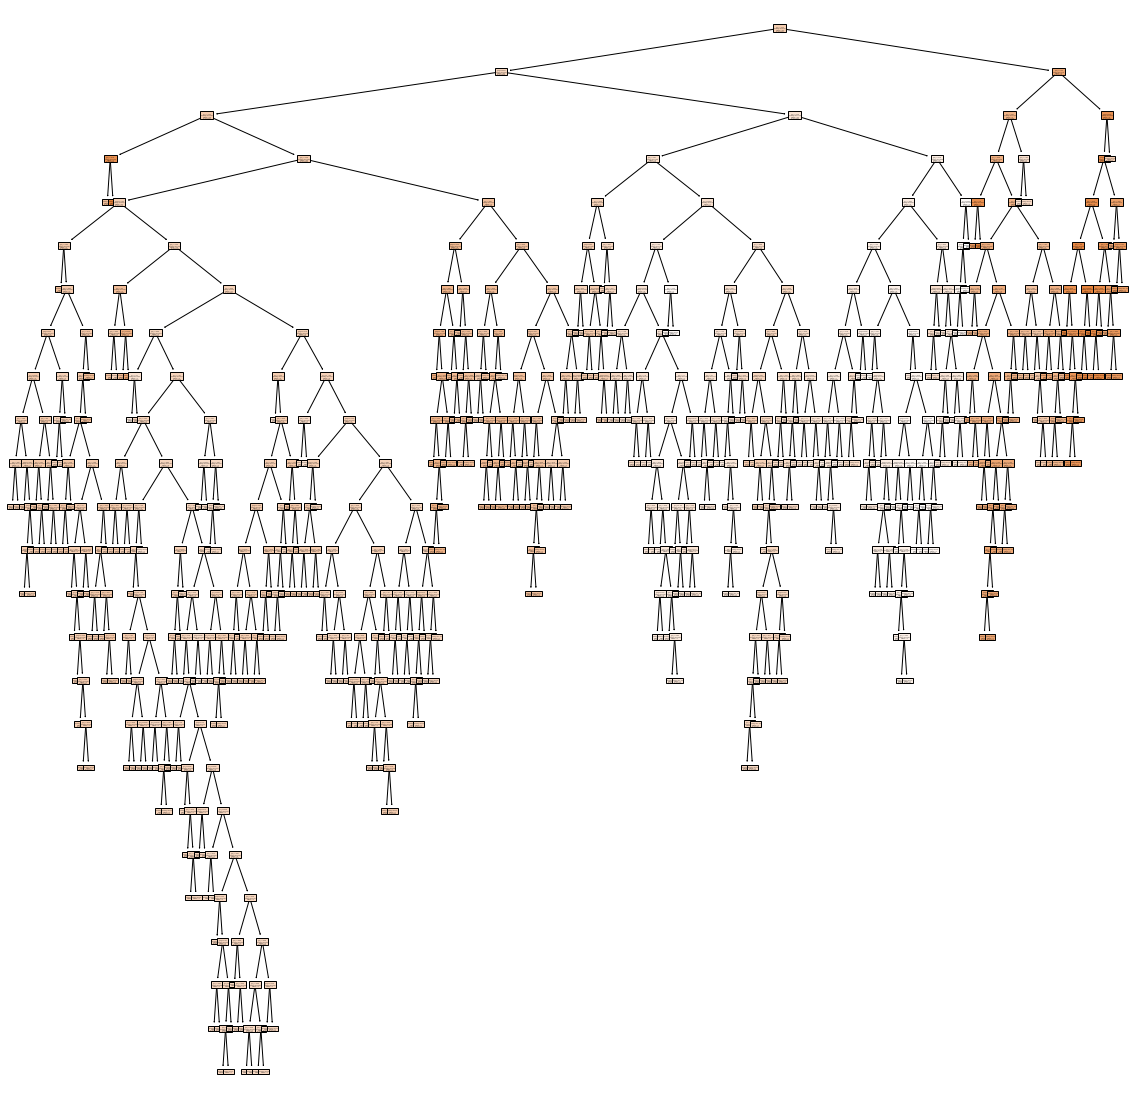

In [126]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtree_reg,filled=True)
plt.show()

In [127]:
p_dtree_tr=dtree_reg.predict(x_tr)

In [128]:
r2_score(y_tr,p_dtree_tr)

1.0

In [129]:
p_dtree_test=dtree_reg.predict(x_test)
r2_score(y_test,p_dtree_test)

0.6603452245282262

In [ ]:
#the model is highly overfitted. giving an accuracy of only .66 with test dataset

In [130]:
p_dtree_test

array([33.3, 30.1, 25. , 18.4, 19.4, 23.8, 28.7, 22.2, 20.1, 12.7, 24.8,
       16.2, 27.5, 20.3, 50. , 30.5, 22.6, 20. , 34.9, 48.8, 31. , 15. ,
       19.8, 18.3, 10.8, 13.1, 23.9, 16.1, 14.9, 19.4, 19.5, 20. , 37.6,
       24.6, 23.6, 34.7, 50. ,  8.8, 13.1, 20.6, 18.9, 23.8, 13.1, 23.4,
       24.3, 28.6, 19.9, 17.2, 14.9, 14.9, 19.4, 20.1, 22. , 25. , 14.1,
       22.5, 34.9, 32.9,  7.2, 20.6, 11.7, 17.2, 17.4, 35.4, 20.6, 25. ,
       15.2, 31.6, 18.8, 17.4, 17.2, 20. , 10.5, 17.8, 30.8,  9.6, 25.3,
       50. , 12.8, 22. , 50. , 39.8, 15.6, 14.6, 18. , 23.2, 20.1, 22.7,
       11.5, 17.6, 30.5, 22. , 23.9, 24.7, 15. , 15.6, 20.3, 45.4,  7.2,
       27.9, 17.1, 13.4])

In [132]:
#applying ensemble learning model

In [135]:
import xgboost as xgb

In [137]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)

In [138]:
xg_reg.fit(x_tr,y_tr)

[23:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, ...)

In [139]:
p_xgb_tr=xg_reg.predict(x_tr)

In [140]:
r2_score(y_tr,p_xgb_tr)

0.9685716657603444

In [141]:
p_xgb_test=xg_reg.predict(x_test)

In [142]:
r2_score(y_test,p_xgb_test)

0.890603795814801

In [147]:
y_test

,medv
198,34.6
229,31.5
502,20.6
31,14.5
315,16.2
...,...
166,50.0
401,7.2
368,50.0
140,14.0


# XGBOOST algorithm with 100 estimators is giving the hightest accuracy of 89.06

In [144]:
p_xgb_test

array([30.514977, 33.640846, 17.1824  , 18.978771, 19.121956, 22.34365 ,
       23.365953, 21.967213, 20.560638, 12.23314 , 22.939926, 13.861068,
       20.940063, 16.347275, 47.1392  , 21.731955, 27.174786, 21.066307,
       28.323723, 48.03741 , 34.395256, 11.230061, 17.390543, 15.086741,
       10.413251, 15.377676, 27.072006, 19.248072, 15.450695, 19.083265,
       17.702213, 23.918095, 40.207718, 22.968199, 31.557472, 37.43477 ,
       18.378876,  9.140579, 16.738909, 23.344559, 20.233063, 18.433983,
       17.932585, 22.500582, 28.384573, 24.695143, 19.427624, 15.083579,
       16.070417, 14.8765  , 19.845354, 20.700283, 22.124933, 25.224775,
       15.53117 , 18.663246, 31.760452, 36.944035,  8.514897, 21.957306,
       14.672355, 14.672966, 15.831332, 28.587841, 18.941647, 24.690964,
       17.944143, 29.430971, 18.697992, 21.303635, 10.431945, 22.396788,
       10.378604, 16.473745, 27.819971, 10.041384, 23.59731 , 40.95291 ,
       11.808018, 23.07447 , 43.529724, 41.846973, 

In [148]:
actual_predicted=pd.DataFrame({"actual":y_test["medv"],"predicted":p_xgb_test})

In [149]:
actual_predicted.head(15)

,actual,predicted
198,34.6,30.514977
229,31.5,33.640846
502,20.6,17.182400
31,14.5,18.978771
315,16.2,19.121956
169,22.3,22.343651
111,22.8,23.365953
206,24.4,21.967213
108,19.8,20.560638
420,16.7,12.233140


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual', ylabel='predicted'>

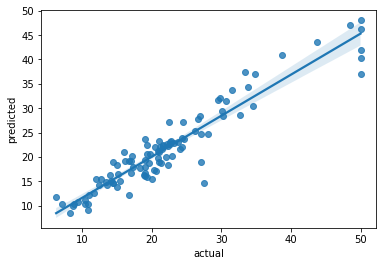

In [150]:
sns.regplot(actual_predicted["actual"],actual_predicted["predicted"])

In [154]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,p_xgb_test))

3.250700394524629

In [156]:
#the root mean squared error is lowest in this model